# **Step 1:**

## Import libraries

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## import  file

In [7]:
#path
path = r'/Users/poojathummar/Documents/career Foundary/Data Immersion/Achi 4 Python Fundamentals for Data Analysts/Instacart Basket Analysis'


In [11]:
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged49.pkl'))

In [15]:
# to preview columns name of the table in list formate by usig .tolist() function
ords_prods_cust_merge.columns.tolist()

['order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'average_spend',
 'spender_flag',
 'customer_frequency',
 'frequency_flag',
 'first_name',
 'surname',
 'gender',
 'state',
 'age',
 'date_joined',
 'n_dependants',
 'marital_status',
 'income',
 '_merge']

# **Step 2:**
##### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [19]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# **Step 3:**
##### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
##### Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
##### Determine whether there’s a difference in spending habits between the different U.S. regions. 

In [22]:
# Creating Northeast Region,Midwest Region,South Region List and est Region List
Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']


In [24]:
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']


In [34]:
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']


In [26]:
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']



In [28]:
# Creating Region Column for Northeast region

ords_prods_cust_merge.loc[ords_prods_cust_merge['state'].isin(Northeast),'region']='Northeast'

In [30]:
# Creating Region Column for Midwest Region

ords_prods_cust_merge.loc[ords_prods_cust_merge['state'].isin(Midwest),'region']='Midwest'

In [36]:
# Creating Region Column for South Region

ords_prods_cust_merge.loc[ords_prods_cust_merge['state'].isin(South),'region']='South'

In [38]:
# Creating Region Column for West Region

ords_prods_cust_merge.loc[ords_prods_cust_merge['state'].isin(West),'region']='West'

In [44]:
ords_prods_cust_merge.shape

(32404859, 34)

In [42]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [46]:
ords_prods_cust_merge['region'].value_counts(dropna=False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [50]:
# Creating Crosstab between region and type_of_spend Columns

region_spender_crosstab=pd.crosstab(ords_prods_cust_merge['region'],ords_prods_cust_merge['spender_flag'],dropna=False)

In [52]:
region_spender_crosstab

spender_flag,High_spender,Low_spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


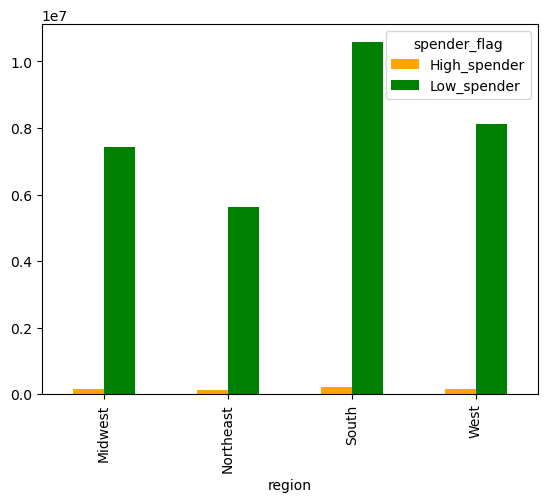

In [54]:
# Bar Chart of region_spender_crosstab 
bar_region_spender=region_spender_crosstab.plot.bar(color=['orange','green'])

# **Step 4:**
##### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [57]:
#To creating exclusion flag column for High-Activity customers 
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order']>=5,'customer_activity_flag']='High Activity'

In [59]:
#To creating exclusion flag column for Low-Activity customers
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order']<5,'customer_activity_flag']='Low Activity'

In [61]:
ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,customer_activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity


In [63]:
# to check frequency of newly created flag
ords_prods_cust_merge['customer_activity_flag'].value_counts(dropna=False)

customer_activity_flag
High Activity    30964564
Low Activity      1440295
Name: count, dtype: int64

In [65]:
# Creating Separate Dataframe for only High-Activity Customers
ords_prods_cust_high_activity=ords_prods_cust_merge[ords_prods_cust_merge['customer_activity_flag']=='High Activity']

In [67]:
# Check new dataframe of only high activity customers
ords_prods_cust_high_activity.shape

(30964564, 35)

In [69]:
# Exporting New Dataframe of only high activity customers
ords_prods_cust_high_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_high_activity410.pkl'))

In [71]:
# Exporting Updated Dataframe for customer flag column of both low and high activity customers
ords_prods_cust_merge.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_activity410.pkl'))

# **Step 5 and 6:**
##### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)
##### Create an appropriate visualization to show the distribution of profiles.

## Profiling Based on Age

In [76]:
ords_prods_cust_merge['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

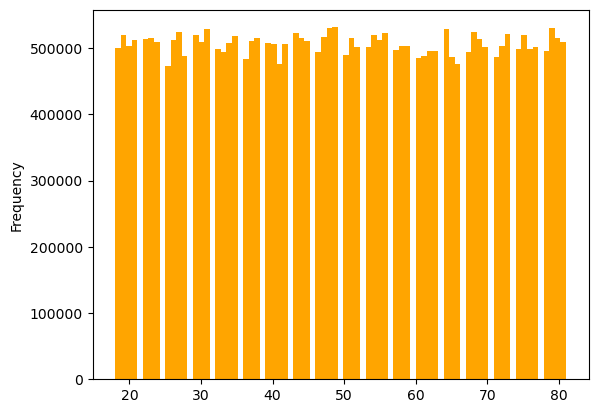

In [82]:
#To create histogram 
ords_prods_cust_merge['age'].plot.hist(bins=81,color='orange')

In [84]:
#  Creating Young Adult age group,Middle-Age Adult age group,Senior age group 
ords_prods_cust_merge.loc[ords_prods_cust_merge['age']<=30,'age_group']='Young Adult'

In [86]:
ords_prods_cust_merge.loc[(ords_prods_cust_merge['age']>30)&(ords_prods_cust_merge['age']<=60),'age_group']='Middle-Age Adult'

In [88]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['age']>60,'age_group']='Senior'

In [90]:
ords_prods_cust_merge['age_group'].value_counts(dropna=False)

age_group
Middle-Age Adult    15222661
Senior              10582839
Young Adult          6599359
Name: count, dtype: int64

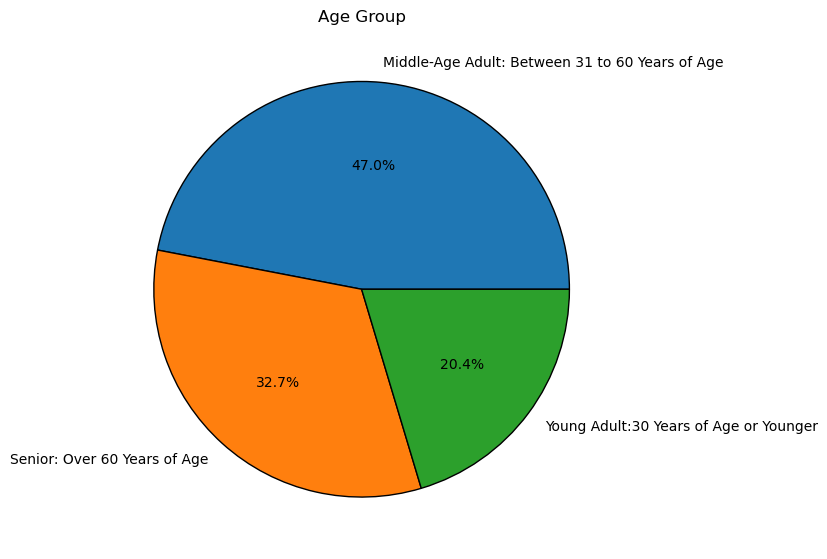

In [92]:
# Creating Pie Chart of Age Groups
age_group_counts = ords_prods_cust_merge['age_group'].value_counts()
plt.figure(figsize=(8,8))
age_group_pie_chart=age_group_counts.plot.pie(labels=('Middle-Age Adult: Between 31 to 60 Years of Age','Senior: Over 60 Years of Age','Young Adult:30 Years of Age or Younger'), 
                          autopct='%.1f%%',
                          wedgeprops={'edgecolor':'black'})
plt.title('Age Group')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [95]:
# Exporting Age Group Pie Chart 
age_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_distribution_pie_chart.png'))


## Profile Based on Income

In [99]:
ords_prods_cust_merge['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

<Axes: ylabel='Frequency'>

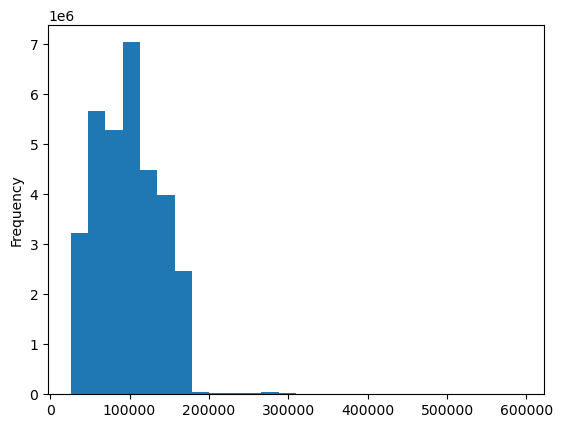

In [97]:
ords_prods_cust_merge['income'].plot.hist(bins=26)

In [101]:
# to create uncome group by low,midd and high
ords_prods_cust_merge.loc[ords_prods_cust_merge['income']<=65000,'income_group']='Low Income'

In [103]:
ords_prods_cust_merge.loc[(ords_prods_cust_merge['income']>65000)&(ords_prods_cust_merge['income']<=130000),'income_group']='Middle Income'

In [105]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['income']>130000,'income_group']='High Income'

In [394]:
ords_prods_cust_merge['income_group'].value_counts(dropna=False)

income_group
Middle Income    17170138
High Income       7713528
Low Income        7521193
Name: count, dtype: int64

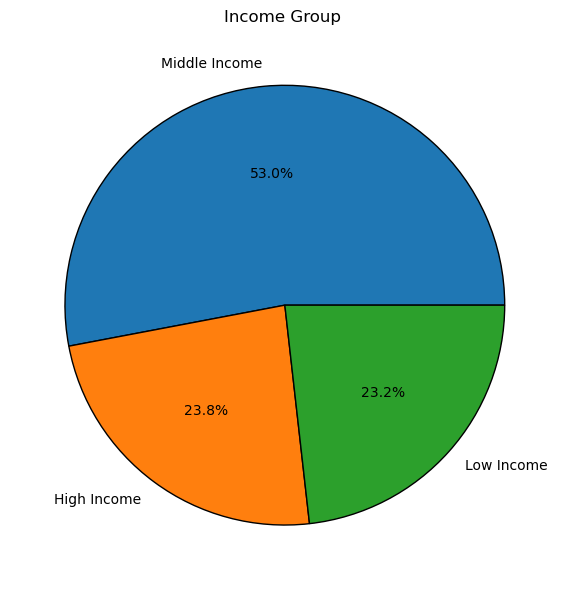

In [107]:
# Creating Pie Chart of Income Groups
income_group_counts = ords_prods_cust_merge['income_group'].value_counts()
plt.figure(figsize=(6,6))
income_group_pie_chart=income_group_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Income Group ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [109]:
# Exporting Income Group Pie Chart
income_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_group_distribution_pie.png'))

## Profile Number of Dependants

In [114]:
ords_prods_cust_merge['n_dependants'].describe()

count    3.240486e+07
mean     1.501896e+00
std      1.118865e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [118]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['n_dependants']<=1,'dependant_size']='Small'

In [120]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['n_dependants']==2,'dependant_size']='Medium'

In [122]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['n_dependants']>=3,'dependant_size']='Large'

In [124]:
ords_prods_cust_merge['dependant_size'].value_counts(dropna=False)

dependant_size
Small     16178607
Large      8135109
Medium     8091143
Name: count, dtype: int64

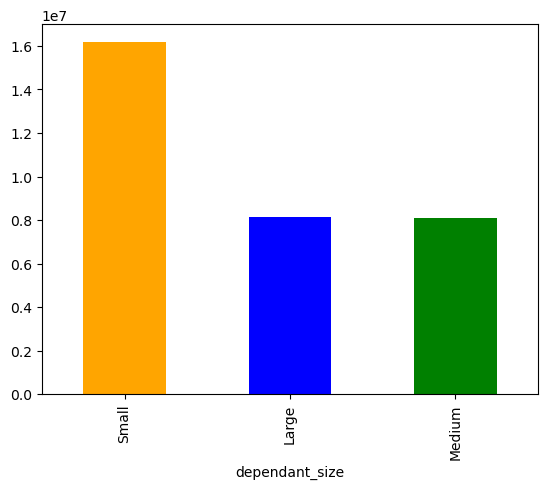

In [128]:
dependant_group_bar = ords_prods_cust_merge['dependant_size'].value_counts().plot.bar(color =['orange','blue','green'])


In [130]:
dependant_group_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependant_group_bar.png'))

## Profile orders_day_of_week

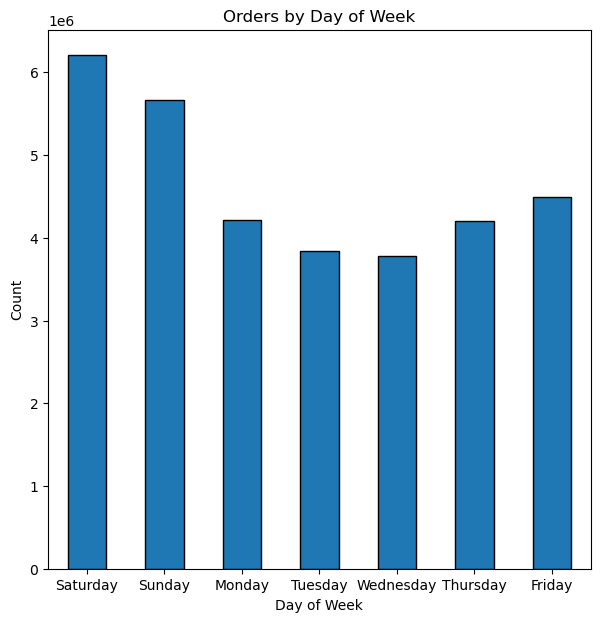

In [142]:
day_names = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

plt.figure(figsize=(7, 7))
ords_day_by_week = ords_prods_cust_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(edgecolor='black', rot=0)
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=[day_names[i] for i in range(7)])
plt.show()

In [144]:
ords_day_by_week.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','ords_day_by_week.png'))

In [152]:
# Creating weekend flag
ords_prods_cust_merge.loc[ords_prods_cust_merge['orders_day_of_week'].isin([0,1]),'week_day_category']='Weekend-high'

In [154]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['orders_day_of_week'].isin([2,3,4,5,6]),'week_day_category']='Weekday-low'

In [156]:
ords_prods_cust_merge['week_day_category'].value_counts(dropna=False)

week_day_category
Weekday-low     20540447
Weekend-high    11864412
Name: count, dtype: int64

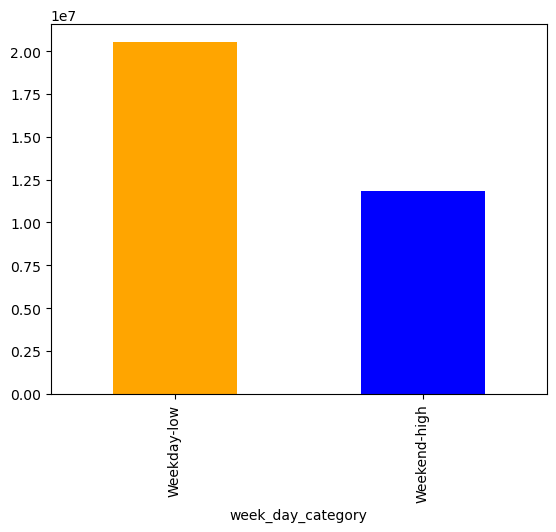

In [158]:
# ctreating bar chart of week days group
week_day_order_count_bar = ords_prods_cust_merge['week_day_category'].value_counts().plot.bar(color =['orange','blue'])


In [160]:
week_day_order_count_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','week_day_order_placement_comparison_bar.png'))

## Profile order_hour_of_day

In [163]:
ords_prods_cust_merge['order_hour_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [165]:
# Creating order hour group 
ords_prods_cust_merge.loc[ords_prods_cust_merge['order_hour_of_day']<12,'order_hour_group']='Morning'

In [167]:
ords_prods_cust_merge.loc[(ords_prods_cust_merge['order_hour_of_day']>=12)&(ords_prods_cust_merge['order_hour_of_day']<=17),'order_hour_group']='Afternoon'

In [169]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['order_hour_of_day']>17,'order_hour_group']='Evening'

In [171]:
ords_prods_cust_merge['order_hour_group'].value_counts(dropna=False)

order_hour_group
Afternoon    15253622
Morning      11448096
Evening       5703141
Name: count, dtype: int64

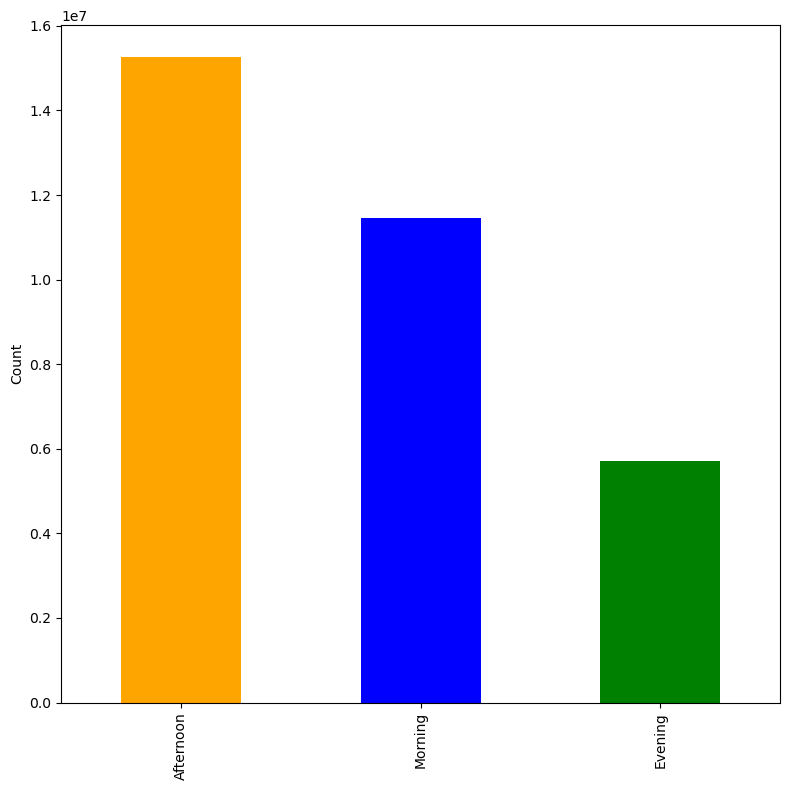

In [181]:
plt.figure(figsize=(8,8))
order_hour_group_count = ords_prods_cust_merge['order_hour_group'].value_counts().plot.bar(color =['orange','blue','green'])
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout()


In [185]:
order_hour_group_count.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_hour_group_comparison_bar.png'))


# **Step:7**
##### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [188]:
ords_prods_cust_merge.columns.tolist()

['order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'average_spend',
 'spender_flag',
 'customer_frequency',
 'frequency_flag',
 'first_name',
 'surname',
 'gender',
 'state',
 'age',
 'date_joined',
 'n_dependants',
 'marital_status',
 'income',
 '_merge',
 'region',
 'customer_activity_flag',
 'age_group',
 'income_group',
 'dependant_size',
 'week_day_category',
 'order_hour_group']

In [192]:
# Creating aggregation subset of customer profile
cust_profile_agg=ords_prods_cust_merge.groupby(['user_id','order_number','days_since_prior_order','loyalty_flag','spender_flag','customer_frequency','state','region','customer_activity_flag','age_group','income','income_group','marital_status','dependant_size','week_day_category','orders_day_of_week','order_hour_group','order_hour_of_day'])['prices'].sum().reset_index()


In [193]:
cust_profile_agg.head()

,user_id,order_number,days_since_prior_order,loyalty_flag,spender_flag,customer_frequency,state,region,customer_activity_flag,age_group,income,income_group,marital_status,dependant_size,week_day_category,orders_day_of_week,order_hour_group,order_hour_of_day,prices
0,1,2,15.0,New customer,Low_spender,20.5,Alabama,South,High Activity,Middle-Age Adult,40423,Low Income,married,Large,Weekday-low,3,Morning,7,35.4
1,1,3,21.0,New customer,Low_spender,20.5,Alabama,South,High Activity,Middle-Age Adult,40423,Low Income,married,Large,Weekday-low,3,Afternoon,12,28.2
2,1,4,29.0,New customer,Low_spender,20.5,Alabama,South,High Activity,Middle-Age Adult,40423,Low Income,married,Large,Weekday-low,4,Morning,7,26.0
3,1,5,28.0,New customer,Low_spender,20.5,Alabama,South,High Activity,Middle-Age Adult,40423,Low Income,married,Large,Weekday-low,4,Afternoon,15,57.0
4,1,6,19.0,New customer,Low_spender,20.5,Alabama,South,High Activity,Middle-Age Adult,40423,Low Income,married,Large,Weekday-low,2,Morning,7,25.0


In [196]:
cust_profile_agg.dtypes

user_id                    object
order_number                int64
days_since_prior_order    float64
loyalty_flag               object
spender_flag               object
customer_frequency        float64
state                      object
region                     object
customer_activity_flag     object
age_group                  object
income                      int64
income_group               object
marital_status             object
dependant_size             object
week_day_category          object
orders_day_of_week          int64
order_hour_group           object
order_hour_of_day           int64
prices                    float64
dtype: object

In [198]:
user_agg=cust_profile_agg.groupby('user_id').agg({'order_number': ['mean', 'min', 'max'],'days_since_prior_order': ['mean', 'min', 'max'],
                                        'orders_day_of_week': ['mean', 'min', 'max'],'order_hour_of_day': ['mean', 'min', 'max'],
                                        'prices': ['mean', 'min', 'max'],'income':['mean','min','max']})

In [200]:
user_agg

order_number         days_since_prior_order              \
                mean min max                   mean   min   max   
user_id                                                           
1                6.0   2  10              19.555556   0.0  30.0   
10               3.5   2   5              19.750000  12.0  30.0   
100              3.5   2   5              26.000000  18.0  30.0   
1000             4.5   2   7              12.166667   5.0  30.0   
10000           37.0   2  72               4.507042   0.0  17.0   
...              ...  ..  ..                    ...   ...   ...   
99995            3.5   2   5              18.000000   6.0  30.0   
99996            7.0   2  12              22.181818  15.0  30.0   
99997            2.5   2   3              22.000000  14.0  30.0   
99998            3.5   2   5               8.750000   7.0  12.0   
99999           18.0   2  34               6.969697   1.0  24.0   

        orders_day_of_week         order_hour_of_day              prices  \
                      mean min max              mean min max        mean   
user_id                                                                    
1                 2.555556   1   4         10.555556   7  16   38.233333   
10                4.000000   3   5         17.250000  15  20  299.500000   
100               2.250000   0   5         17.500000  15  20   60.700000   
1000              2.833333   0   6         16.833333  14  18  122.916667   
10000             2.760563   0   6         11.380282   5  22  121.188732   
...                    ...  ..  ..               ...  ..  ..         ...   
99995             3.250000   0   6         13.000000  12  14   88.825000   
99996             2.272727   1   5         10.545455   8  13   78.118182   
99997             2.000000   2   2         13.500000  12  15   70.500000   
99998             2.250000   1   6         12.000000   9  17   42.325000   
99999             2.454545   0   6         14.606061   7  23   70.118182   

                         income                  
           min    max      mean     min     max  
user_id                                          
1         25.0   63.1   40423.0   40423   40423  
10       240.0  429.6   52716.0   52716   52716  
100       28.2   97.6  138741.0  138741  138741  
1000     112.9  134.4   63581.0   63581   63581  
10000     11.8  298.2   61257.0   61257   61257  
...        ...    ...       ...     ...     ...  
99995     42.9  132.5   92882.0   92882   92882  
99996      2.8  127.1  107293.0  107293  107293  
99997     31.6  109.4   71271.0   71271   71271  
99998     20.9   51.2   98951.0   98951   98951  
99999      6.7  159.7   55497.0   55497   55497  

[206208 rows x 18 columns]

In [202]:
# Creating aggregation by age_group for days_since_prior_order & prices
age_group_agg=cust_profile_agg.groupby('age_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [204]:
age_group_agg

days_since_prior_order                 prices               
                                   mean  min   max        mean  min       max
age_group                                                                    
Middle-Age Adult              10.693267  0.0  30.0  121.530076  1.0  100442.8
Senior                        10.702699  0.0  30.0  118.998289  1.0  100452.9
Young Adult                   10.746529  0.0  30.0  121.740161  1.0  100311.3

In [206]:
# Creating aggregation by income_group for days_since_prior_order & prices
income_group_agg=cust_profile_agg.groupby('income_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})
income_group_agg

days_since_prior_order                 prices               
                                mean  min   max        mean  min       max
income_group                                                              
High Income                10.514026  0.0  30.0  237.037517  1.0  100452.9
Low Income                 11.165659  0.0  30.0   63.922136  1.0   15298.4
Middle Income              10.555562  0.0  30.0   97.993749  1.0  100384.5

In [208]:
# Creating aggregation by dependant_size group for days_since_prior_order & prices dependant_size
dependant_size_agg=cust_profile_agg.groupby('dependant_size').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})
dependant_size_agg

days_since_prior_order                 prices               
                                 mean  min   max        mean  min       max
dependant_size                                                             
Large                       10.680234  0.0  30.0  118.299006  1.0  100330.2
Medium                      10.736552  0.0  30.0  125.860276  1.0  100452.9
Small                       10.706005  0.0  30.0  119.421591  1.0  100442.8

In [212]:
# Creating aggregation by week_day_category group for days_since_prior_order & prices
week_day_category_agg=cust_profile_agg.groupby('week_day_category').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})
week_day_category_agg

days_since_prior_order                 prices               
                                    mean  min   max        mean  min       max
week_day_category                                                             
Weekday-low                    10.479112  0.0  30.0  119.016233  1.0  100403.8
Weekend-high                   11.138152  0.0  30.0  124.008368  1.0  100452.9

In [214]:
# Creating aggregation by order_hour_group for days_since_prior_order & prices
order_hour_group_agg=cust_profile_agg.groupby('order_hour_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})
order_hour_group_agg

days_since_prior_order                 prices               
                                   mean  min   max        mean  min       max
order_hour_group                                                             
Afternoon                     10.836544  0.0  30.0  121.307800  1.0  100452.9
Evening                       10.587939  0.0  30.0  116.803526  1.0  100301.1
Morning                       10.593427  0.0  30.0  121.961765  1.0  100322.1

# **Step 8:**
##### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.


In [219]:
# Creating crosstab to compare age_group profile with region locations
age_region_comparison=pd.crosstab(ords_prods_cust_merge['age_group'],ords_prods_cust_merge['region'],dropna=False)
age_region_comparison

region,Midwest,Northeast,South,West
age_group,,,,
Middle-Age Adult,3601775,2666903,5046936,3907047
Senior,2465259,1894192,3518088,2705300
Young Adult,1530291,1161641,2226861,1680566


<Figure size 700x700 with 0 Axes>

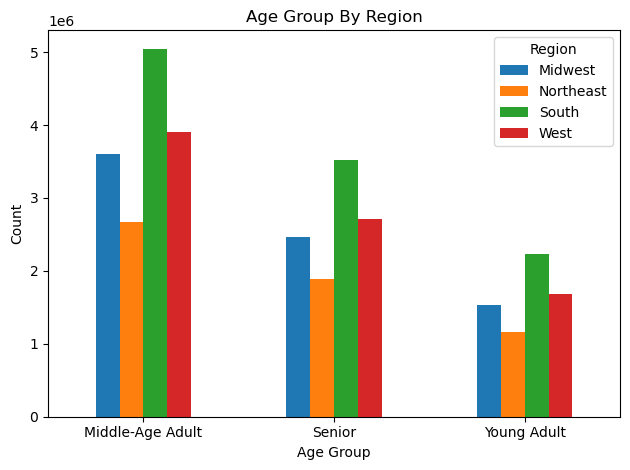

In [221]:
# Creating Bar Chart for Age Group By Region Comparison
plt.figure(figsize=(7, 7))
age_region_comparison_bar= age_region_comparison.plot(kind='bar',rot=0)
plt.title('Age Group By Region')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [223]:
age_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_region_comparison_bar.png'))

In [263]:
# Creating crosstab to compare age_group profile with customer frequency type
age_customer_frequency_comparison=pd.crosstab(ords_prods_cust_merge['age_group'],ords_prods_cust_merge['frequency_flag'])
age_customer_frequency_comparison

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Middle-Age Adult,10110383,1711300,3400978
Senior,7060357,1183102,2339375
Young Adult,4389113,742035,1468211


<Figure size 1000x700 with 0 Axes>

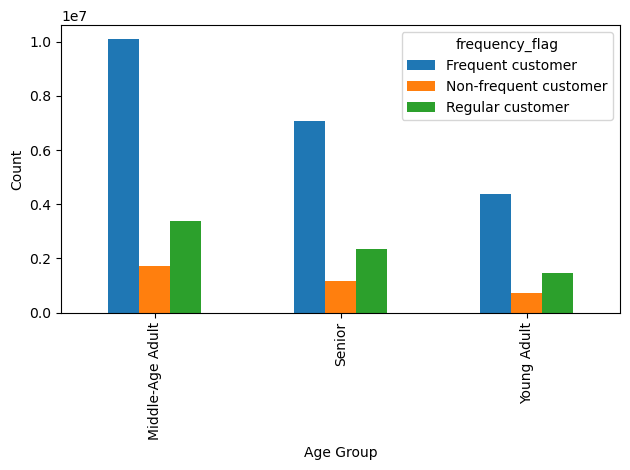

In [265]:
# Creating Bar Chart for age_group By customer frequency Comparison
plt.figure(figsize=(10, 7))
age_customer_frequency_comparison_bar= age_customer_frequency_comparison.plot.bar()
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()


In [267]:
age_customer_frequency_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_customer_frequency_comparison_bar.png'))

In [269]:
# Creating Crosstab Bewtween age_group and loyalty_flag
age_group_loyalty_comparison=pd.crosstab(ords_prods_cust_merge['age_group'],ords_prods_cust_merge['loyalty_flag'],dropna=False)
age_group_loyalty_comparison

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
Middle-Age Adult,4860439,2917844,7444378
Senior,3364684,2049433,5168722
Young Adult,2058970,1276713,3263676


<Figure size 1000x700 with 0 Axes>

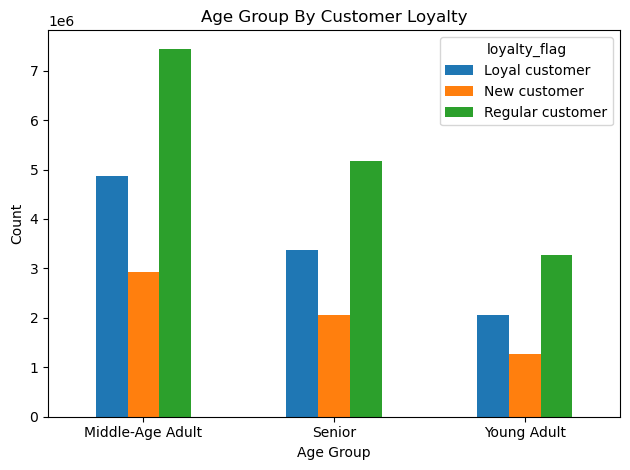

In [271]:
# Creating Bar Chart for age_group By customer loyalty
plt.figure(figsize=(10, 7))
age_group_loaylty_comparison_bar= age_group_loyalty_comparison.plot(kind='bar', rot=0)
plt.title('Age Group By Customer Loyalty')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [273]:
age_group_loaylty_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_loaylty_comparison_bar.png'))

In [275]:
ords_prods_cust_merge['income_group'].value_counts(dropna=False)

income_group
Middle Income    17170138
High Income       7713528
Low Income        7521193
Name: count, dtype: int64

In [279]:
# Creating Crosstab Bewtween income_group and region
income_region_comparison=pd.crosstab(ords_prods_cust_merge['income_group'],ords_prods_cust_merge['region'],dropna=False)
income_region_comparison

region,Midwest,Northeast,South,West
income_group,,,,
High Income,1835777,1367168,2546153,1964430
Low Income,1737985,1317307,2532055,1933846
Middle Income,4023563,3038261,5713677,4394637


<Figure size 1000x700 with 0 Axes>

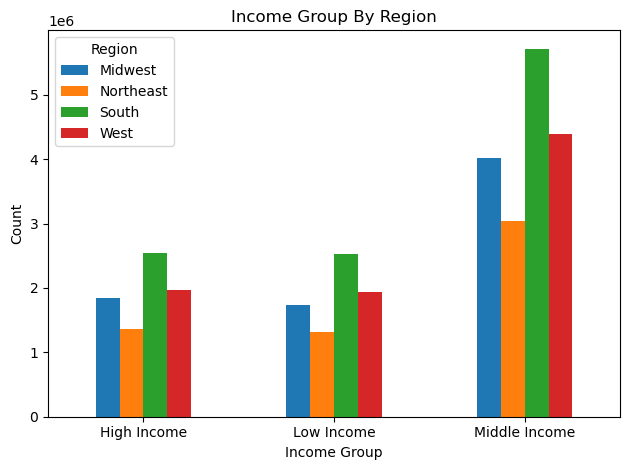

In [281]:
# Creating Bar Chart for Income Group By Region Comparison
plt.figure(figsize=(10, 7))
income_region_comparison_bar= income_region_comparison.plot(kind='bar',rot=0)
plt.title('Income Group By Region')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [283]:
income_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_region_comparison_bar.png'))

In [285]:
# Creating Crosstab for dependant_size of customers by region
dependant_size_region_comparison=pd.crosstab(ords_prods_cust_merge['dependant_size'],ords_prods_cust_merge['region'],dropna=False)
dependant_size_region_comparison

region,Midwest,Northeast,South,West
dependant_size,,,,
Large,1874667,1445080,2706538,2108824
Medium,1890986,1417102,2723958,2059097
Small,3831672,2860554,5361389,4124992


<Figure size 1000x700 with 0 Axes>

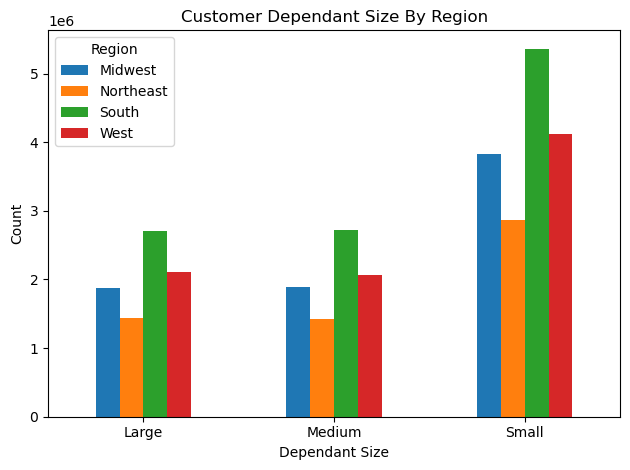

In [287]:
# Creating Bar Chart for dependant_size Group By Region Comparison
plt.figure(figsize=(10, 7))
dependant_size_region_comparison_bar= dependant_size_region_comparison.plot(kind='bar',rot=0)
plt.title('Customer Dependant Size By Region')
plt.xlabel('Dependant Size')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [289]:
dependant_size_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependant_size_region_comparison_bar.png'))

In [291]:
week_day_category_region_comparison=pd.crosstab(ords_prods_cust_merge['week_day_category'],ords_prods_cust_merge['region'],dropna=False)
week_day_category_region_comparison

region,Midwest,Northeast,South,West
week_day_category,,,,
Weekday-low,4816380,3625525,6847052,5251490
Weekend-high,2780945,2097211,3944833,3041423


<Figure size 1000x700 with 0 Axes>

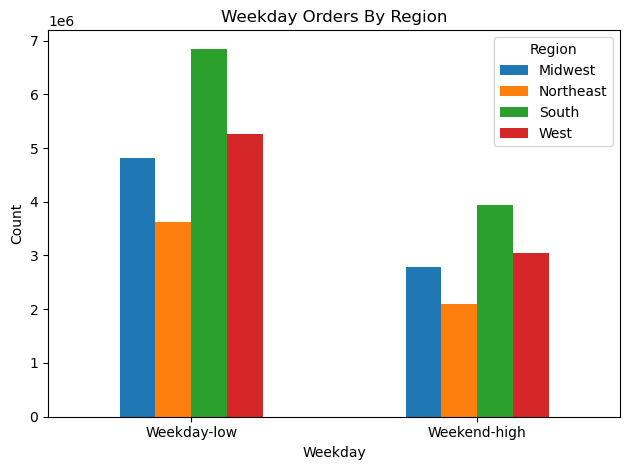

In [293]:
plt.figure(figsize=(10, 7))
week_day_category_region_comparison_bar= week_day_category_region_comparison.plot(kind='bar',rot=0)
plt.title('Weekday Orders By Region')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [295]:
week_day_category_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','week_day_category_region_comparison_bar.png'))

In [299]:
# Creating Crosstabfor Weekday Order placement by Region
order_hour_group_region_comparison=pd.crosstab(ords_prods_cust_merge['order_hour_group'],ords_prods_cust_merge['region'],dropna=False)

<Figure size 1000x700 with 0 Axes>

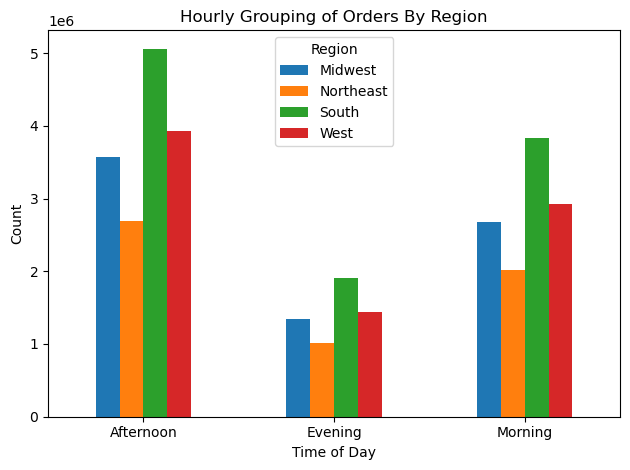

In [301]:
plt.figure(figsize=(10, 7))
order_hour_group_region_comparison_bar= order_hour_group_region_comparison.plot(kind='bar',rot=0)
plt.title('Hourly Grouping of Orders By Region')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [303]:
order_hour_group_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','order_hour_group_region_comparison_bar.png'))

In [309]:
ords_prods_cust_merge['frequency_flag'].value_counts()

frequency_flag
Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
Name: count, dtype: int64

In [317]:
 #Creating crosstab to compare region with frequency_flag
region_customer_frequency_comparison=pd.crosstab(ords_prods_cust_merge['region'],ords_prods_cust_merge['frequency_flag'])


<Figure size 1000x700 with 0 Axes>

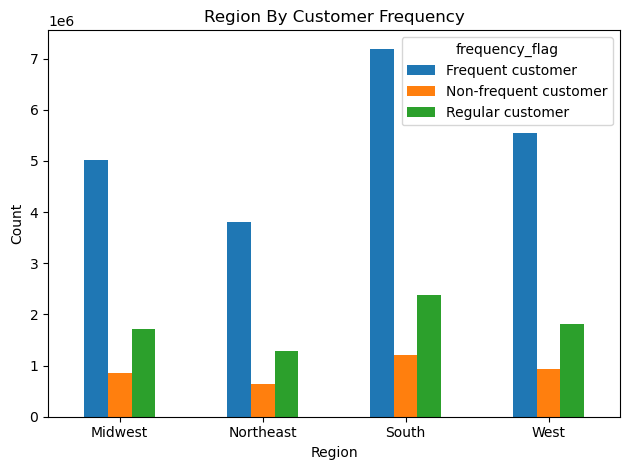

In [319]:
plt.figure(figsize=(10, 7))
region_customer_frequency_comparison_bar= region_customer_frequency_comparison.plot(kind='bar', rot=0)
plt.title('Region By Customer Frequency')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [321]:
region_customer_frequency_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_customer_frequency_comparison_bar.png'))

In [325]:
# Creating crosstab to compare region with spender_flag
region_type_of_spender_comparison=pd.crosstab(ords_prods_cust_merge['region'],ords_prods_cust_merge['spender_flag'],dropna=False)


<Figure size 0x0 with 0 Axes>

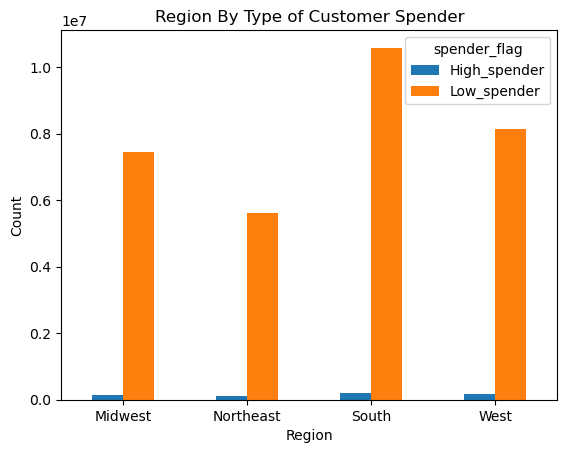

In [327]:
# Creating Bar Chart for region By type of spender
plt.figure(figsize=(0, 0))
region_type_of_spender_comparison_bar= region_type_of_spender_comparison.plot(kind='bar', rot=0)
plt.title('Region By Type of Customer Spender')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [329]:
region_type_of_spender_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_type_of_spender_comparison_bar.png'))

In [331]:
# Creating crosstab to compare loyalty_flag with spender_flag
loyalty_type_of_spender_comparison=pd.crosstab(ords_prods_cust_merge['loyalty_flag'],ords_prods_cust_merge['spender_flag'],dropna=False)

<Figure size 0x0 with 0 Axes>

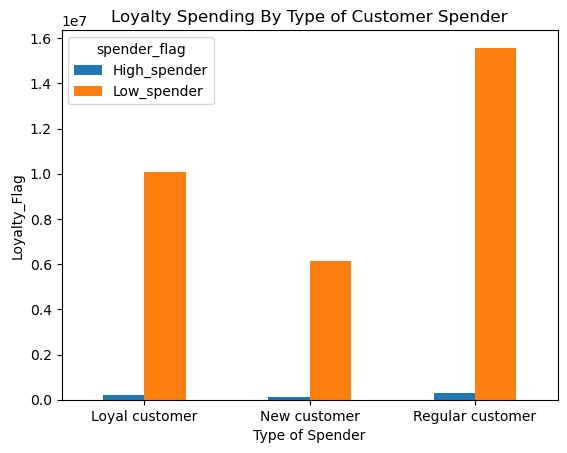

In [333]:
# Creating Bar Chart for Loyalty spending By type of spender
plt.figure(figsize=(0, 0))
loyalty_type_of_spender_comparison_bar= loyalty_type_of_spender_comparison.plot(kind='bar', rot=0)
plt.title('Loyalty Spending By Type of Customer Spender')
plt.xlabel('Type of Spender')
plt.ylabel('Loyalty_Flag')
plt.show()

In [335]:
loyalty_type_of_spender_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_type_of_spender_comparison_bar.png'))

## Profiles Compared with Departments

In [338]:
# Importing department wrangled dataframe
df_dept=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled44.csv'))

In [340]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages


In [342]:
df_dept.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [356]:
df_dept.dtypes

department_id    object
department       object
dtype: object

In [358]:
# Changing department_id from int64 to str for merge
df_dept['department_id']=df_dept['department_id'].astype(str)

In [360]:
df_dept.dtypes

department_id    object
department       object
dtype: object

In [348]:
ords_prods_cust_merge=ords_prods_cust_merge.drop(columns=['_merge'])

In [362]:
ords_prods_cust_merge['department_id']=ords_prods_cust_merge['department_id'].astype(str)

In [364]:
ords_prods_cust_merge.dtypes

order_id                    int64
user_id                    object
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id              object
prices                    float64
price_range_loc            object
busiest_day                object
busiest_days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
average_spend             float64
spender_flag               object
customer_frequency        float64
frequency_flag             object
first_name                 object
surname                    object
gender                     object
state                      object
age                         int64
date_joined                object
n_dependants  

In [366]:
ords_prods_cust_dept_merge=ords_prods_cust_merge.merge(df_dept,on='department_id',indicator=True)

In [370]:
# Exporting new dataframe with deptartment merged to main dataframe
ords_prods_cust_dept_merge.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customer_department_merge410.pkl'))

In [390]:
ords_prods_cust_dept_merge.shape

(16033825, 41)

In [372]:
ords_prods_cust_dept_merge['department'].value_counts()

department
produce          9479291
beverages        2688123
frozen           2234743
bakery           1172428
international     269253
alcohol           153696
other              36291
Name: count, dtype: int64

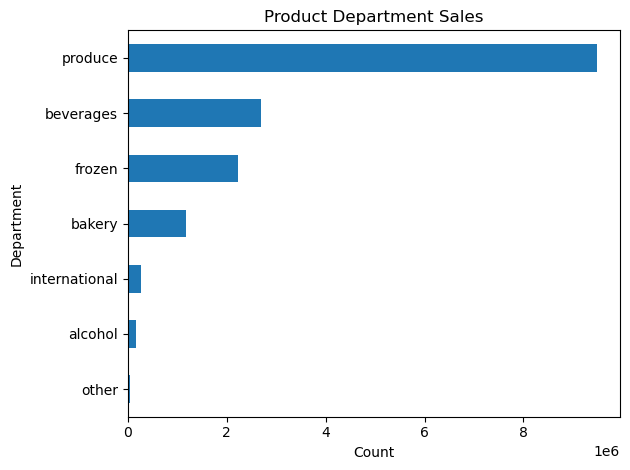

In [374]:
dept_bar=ords_prods_cust_dept_merge['department'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()

In [376]:
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_product_bar.png'))

In [378]:
age_department_comparison=pd.crosstab(ords_prods_cust_dept_merge['age_group'],ords_prods_cust_dept_merge['department'],dropna=False)

<Figure size 2500x2500 with 0 Axes>

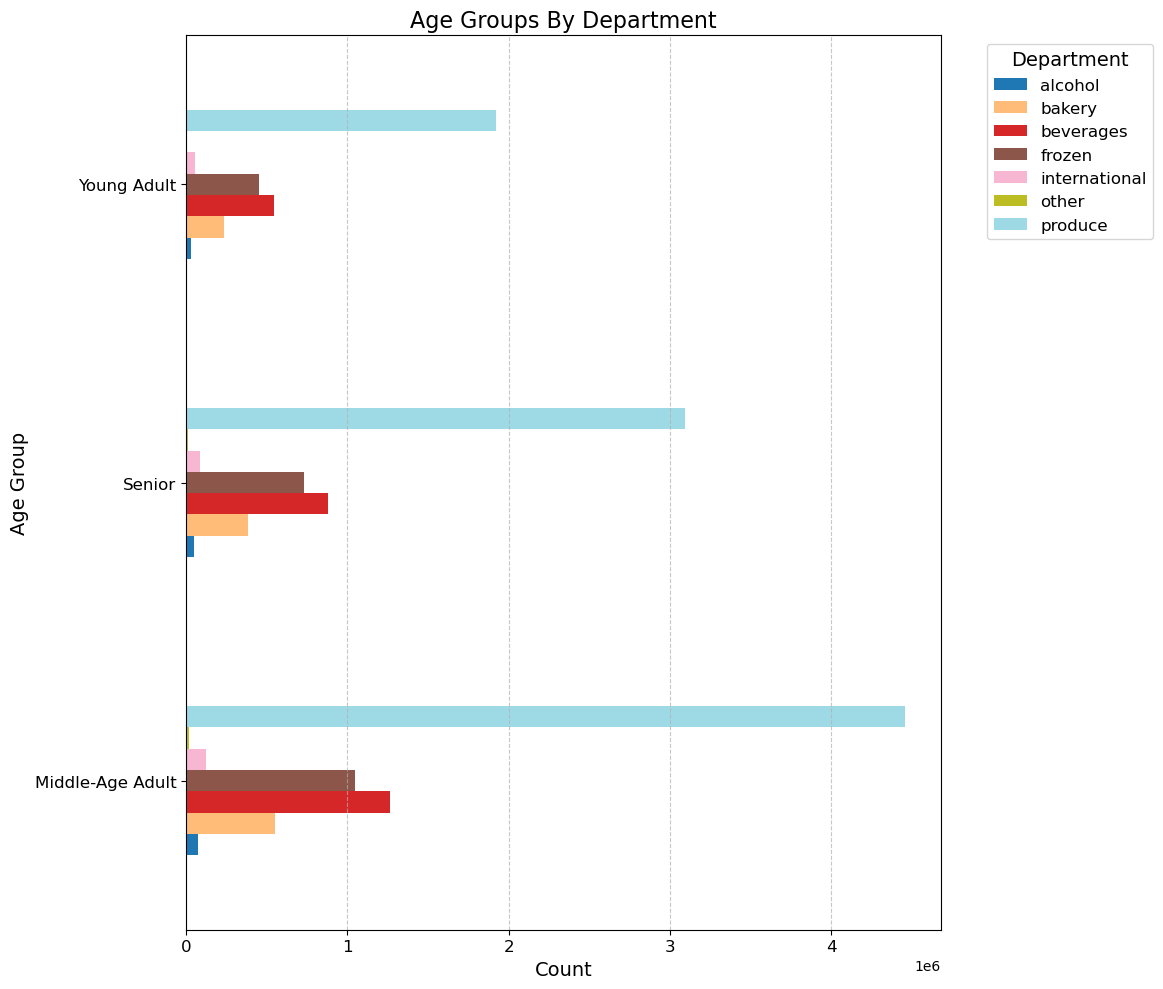

In [380]:
plt.figure(figsize=(25, 25))
age_department_comparison_bar = age_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Age Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [382]:
age_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_department_comparison_bar.png'))

In [384]:
region_department_comparison=pd.crosstab(ords_prods_cust_dept_merge['region'],ords_prods_cust_dept_merge['department'],dropna=False)

<Figure size 2000x2500 with 0 Axes>

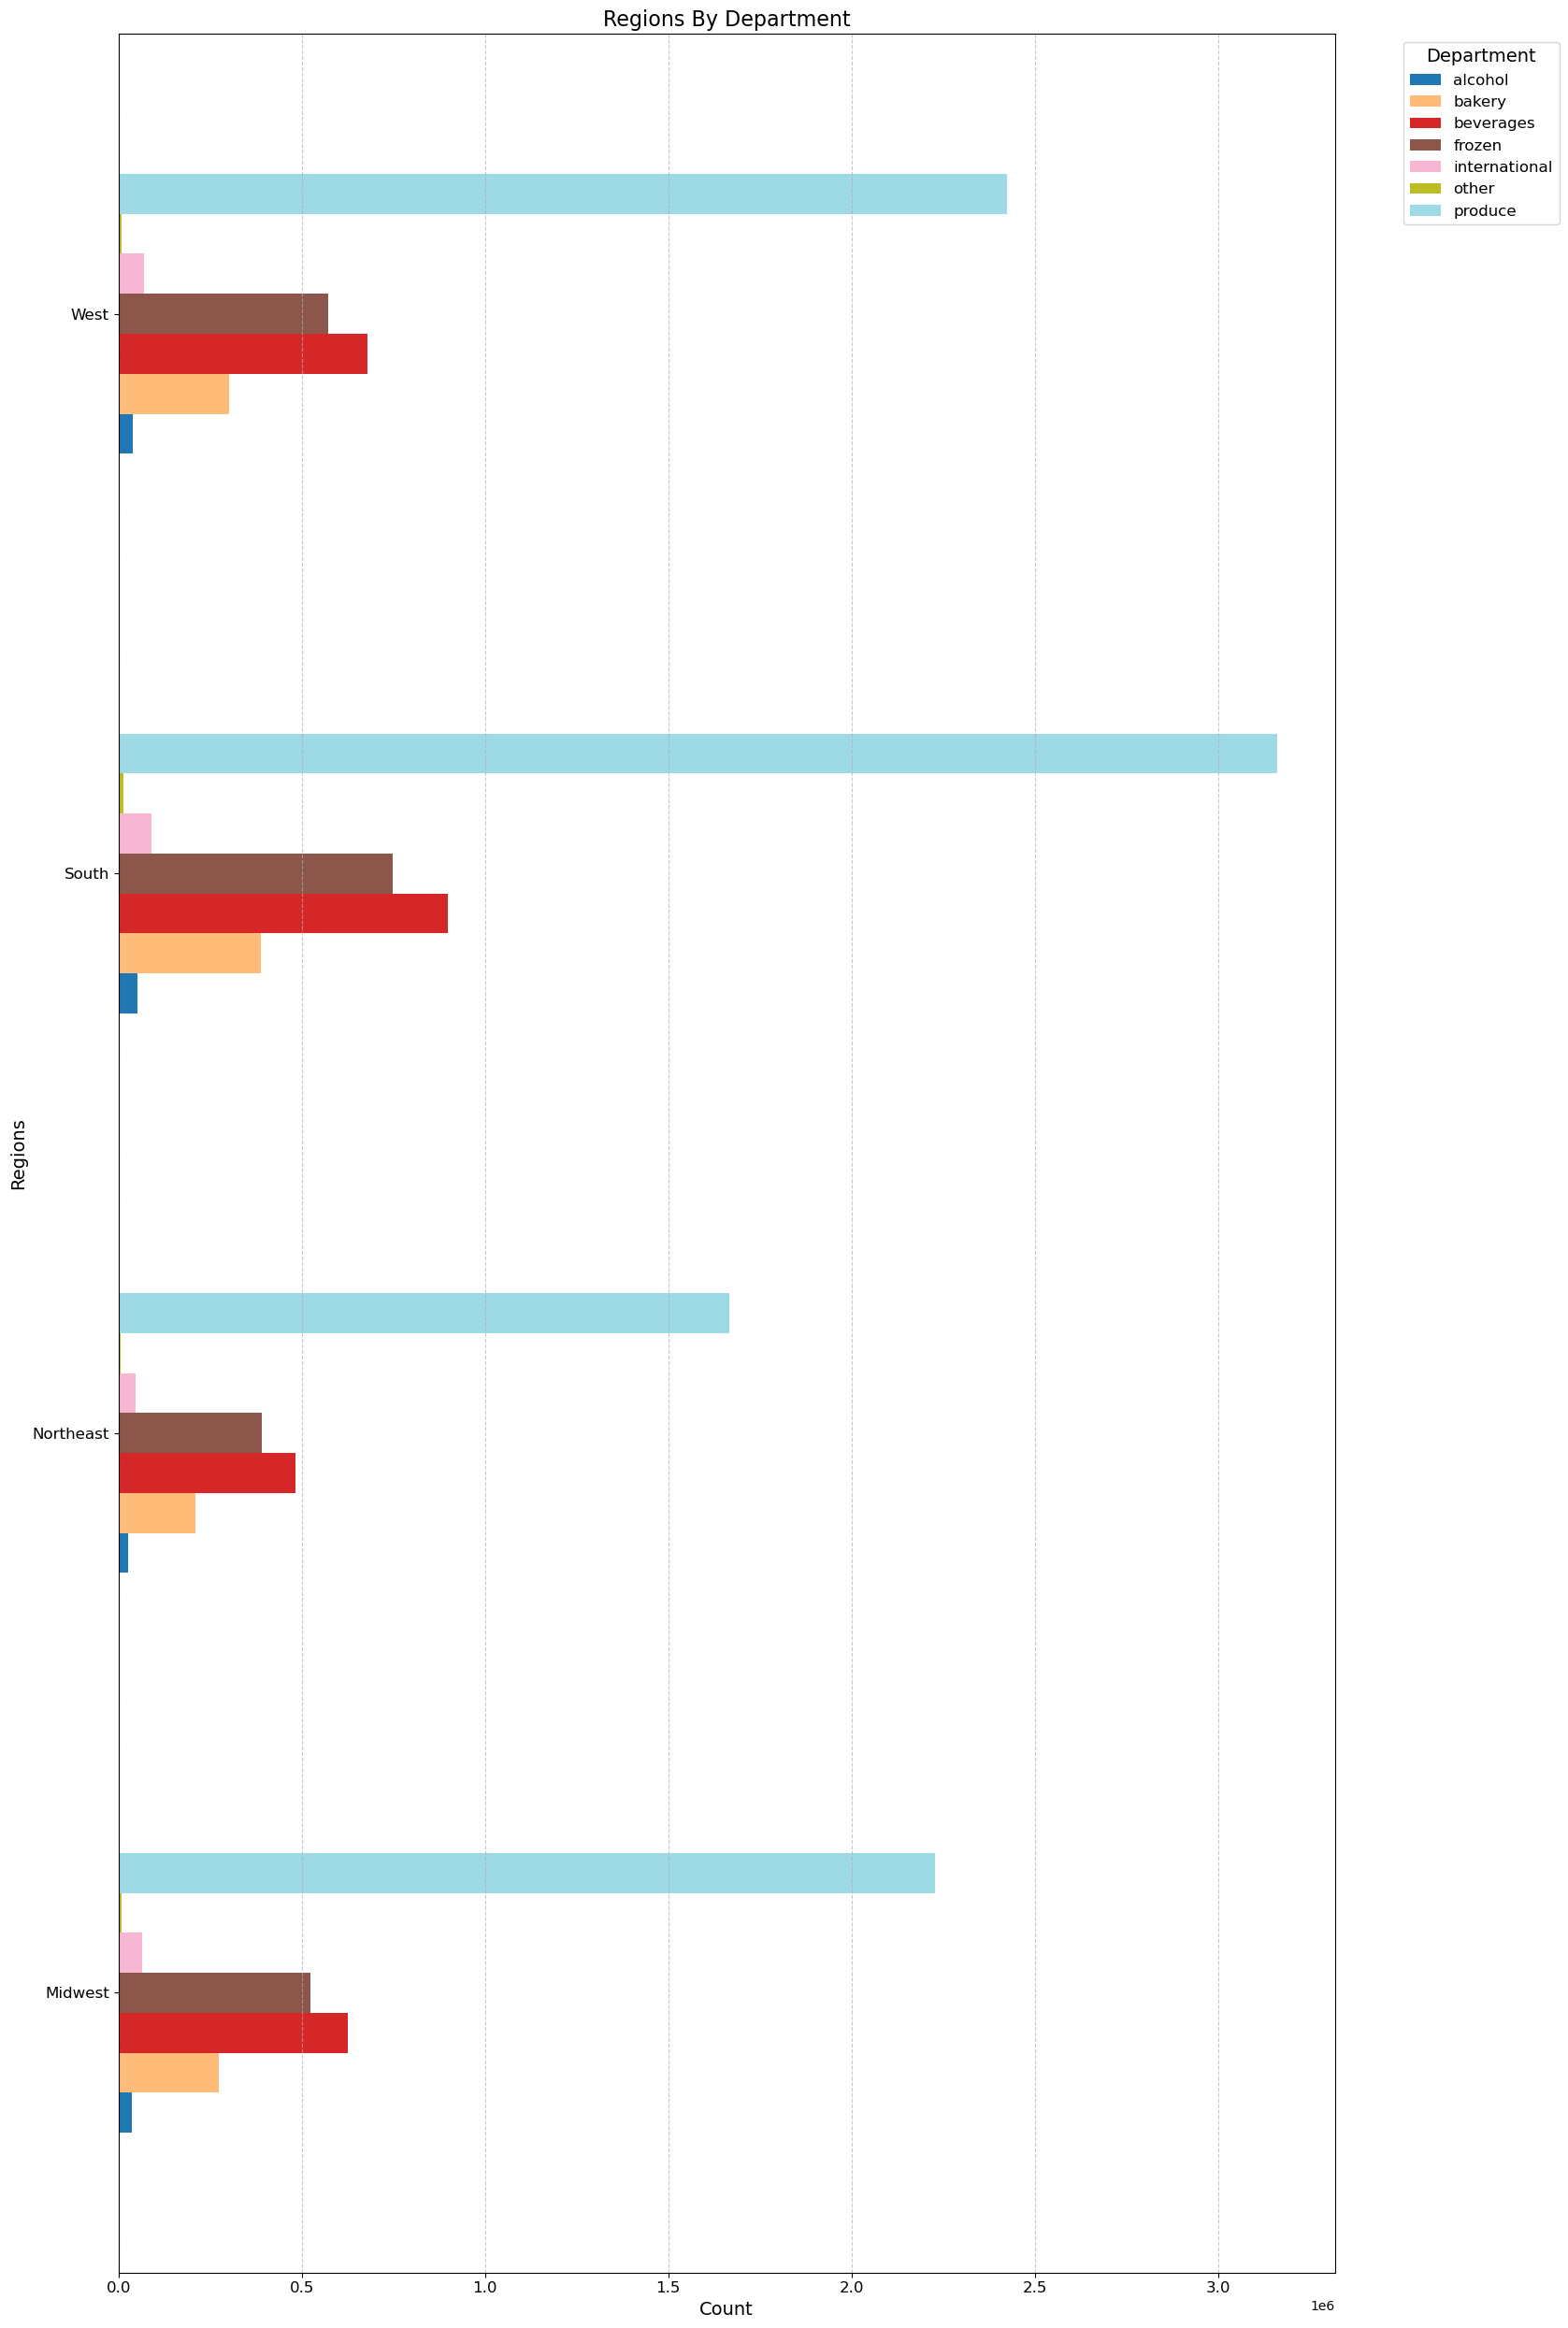

In [386]:
plt.figure(figsize=(20, 25))
region_department_comparison_bar = region_department_comparison.plot(kind='barh', figsize=(20, 25), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Regions By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Regions', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [388]:
region_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_department_comparison_bar.png'))